In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import mean_squared_error

In [117]:
data = load_breast_cancer()

data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [118]:
X = data.data
y = data.target
feature_names = data.feature_names

print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])


Number of samples: 569
Number of features: 30


In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [120]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [121]:
X_train
X_test

array([[-0.48313229, -0.13285829, -0.46029654, ..., -0.19338258,
         0.21048039,  0.22648723],
       [ 1.34906186,  0.51103428,  1.29204314, ...,  1.01968394,
        -0.53341696, -1.00866239],
       [ 0.36358494,  0.0762286 ,  0.38928522, ...,  0.58868486,
        -0.07390369, -0.19132599],
       ...,
       [-1.20977993, -0.2611616 , -1.1400444 , ..., -0.23099704,
        -0.4321955 ,  1.86687566],
       [-0.10083521,  1.26659826,  0.00303674, ...,  0.59965574,
         1.23394176,  1.98690408],
       [-0.36419542, -1.19967661, -0.30118031, ...,  0.66234652,
        -0.39202826,  1.95832589]])

In [122]:
model_no_reg = LogisticRegression(
    penalty=None, solver="lbfgs", max_iter=5000
)
model_no_reg.fit(X_train, y_train)


LogisticRegression(max_iter=5000, penalty=None)

In [123]:
weights_no_reg = model_no_reg.coef_[0]
print("Non-zero weights:", np.sum(np.abs(weights_no_reg) > 1e-4))


Non-zero weights: 30


In [124]:
train_probs_no_reg = model_no_reg.predict_proba(X_train)[:, 1]
mse_no_reg = mean_squared_error(y_train, train_probs_no_reg)
print("MSE Loss:", mse_no_reg)


MSE Loss: 1.6691867223758958e-06


In [125]:
cost_no_reg = mse_no_reg
print("Cost:", cost_no_reg)


Cost: 1.6691867223758958e-06


In [126]:
train_acc_no_reg = accuracy_score(y_train, model_no_reg.predict(X_train))
test_acc_no_reg = accuracy_score(y_test, model_no_reg.predict(X_test))

print("Training Accuracy:", train_acc_no_reg)
print("Testing Accuracy :", test_acc_no_reg)
print("Accuracy Gap     :", train_acc_no_reg - test_acc_no_reg)


Training Accuracy: 1.0
Testing Accuracy : 0.9590643274853801
Accuracy Gap     : 0.040935672514619936


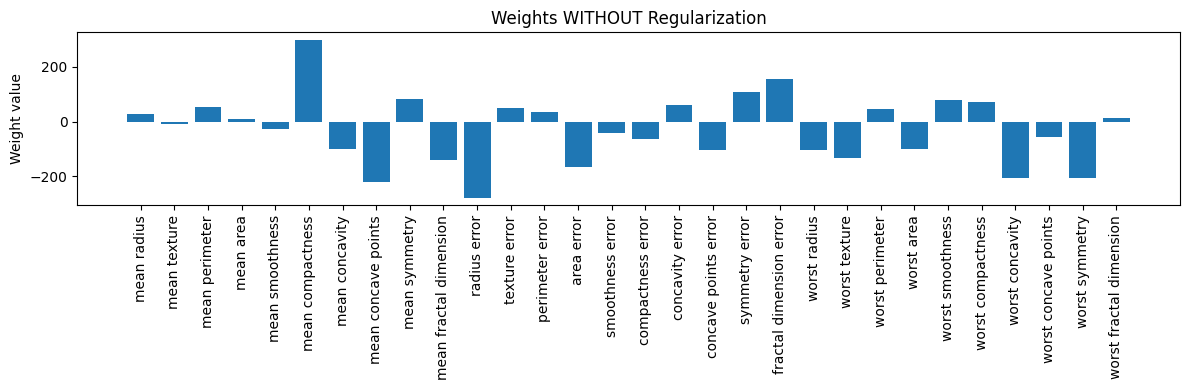

In [127]:
plt.figure(figsize=(12,4))
plt.bar(feature_names, coef_none)
plt.title("Weights WITHOUT Regularization")
plt.xticks(rotation=90)
plt.ylabel("Weight value")
plt.tight_layout()
plt.show()


In [128]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_none,
    X_train,
    y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


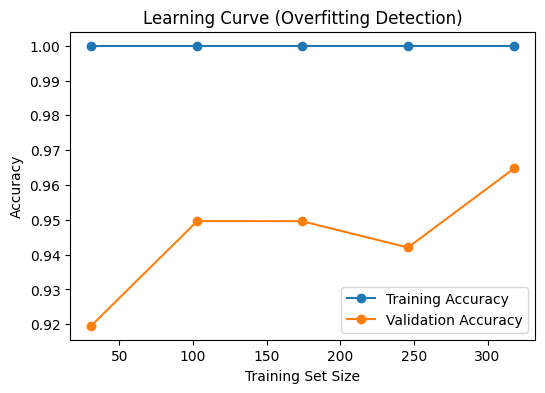

In [129]:
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Overfitting Detection)")
plt.legend()
plt.show()


# L1 REULARIZATION

In [155]:
model_l1 = LogisticRegression(
    penalty="l1", solver="liblinear"
)
model_l1.fit(X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [156]:
weights_l1 = model_l1.coef_[0]
print("Non-zero weights:", np.sum(np.abs(weights_l1) > 1e-4))


Non-zero weights: 16


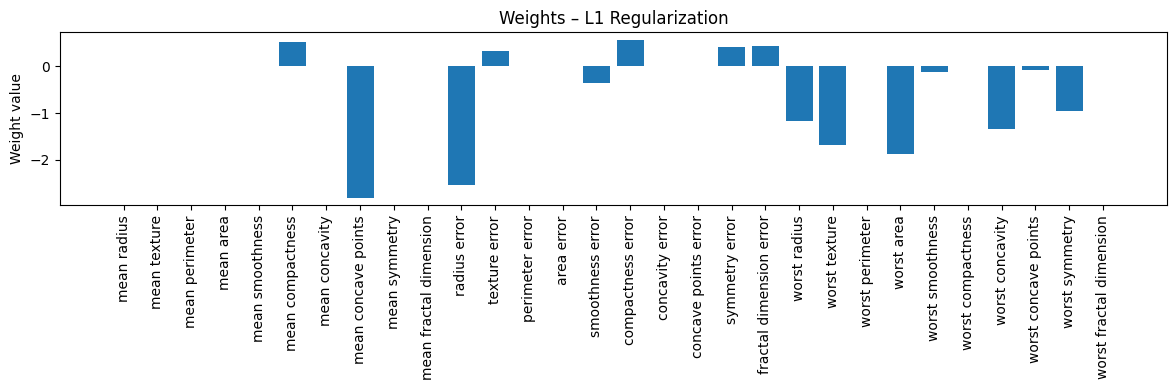

In [157]:
plt.figure(figsize=(12,4))
plt.bar(feature_names, weights_l1)
plt.xticks(rotation=90)
plt.title("Weights – L1 Regularization")
plt.ylabel("Weight value")
plt.tight_layout()
plt.show()


In [158]:
train_probs_l1 = model_l1.predict_proba(X_train)[:, 1]
mse_l1 = mean_squared_error(y_train, train_probs_l1)

penalty_l1 = lambda_value * np.sum(np.abs(weights_l1))
cost_l1 = mse_l1 + penalty_l1

print("MSE Loss:", mse_l1)
print("Penalty:", penalty_l1)
print("Cost:", cost_l1)


MSE Loss: 0.01327543293034231
Penalty: 151.78055171254292
Cost: 151.79382714547324


In [159]:
train_acc_l1 = accuracy_score(y_train, model_l1.predict(X_train))
test_acc_l1 = accuracy_score(y_test, model_l1.predict(X_test))

print("Training Accuracy:", train_acc_l1)
print("Testing Accuracy :", test_acc_l1)
print("Accuracy Gap     :", train_acc_l1 - test_acc_l1)


Training Accuracy: 0.9874371859296482
Testing Accuracy : 0.9824561403508771
Accuracy Gap     : 0.004981045578771104


In [160]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_l1,
    X_train,
    y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


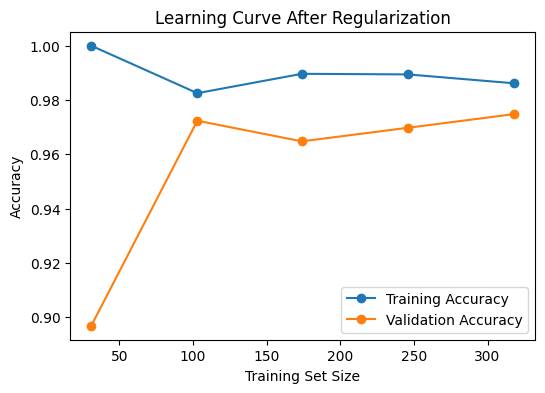

In [161]:
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve After Regularization")
plt.legend()
plt.show()


# L2 REGULARIZATION

In [162]:
lambda_values = [0.001, 0.01, 0.1, 1, 10]
cv_mse_l2 = []


In [163]:
for lambda_value in lambda_values:
    model_l2= LogisticRegression(
        penalty="l2",
        solver="lbfgs",
        C=1/lambda_value,
        max_iter=5000
    )

    scores = cross_val_score(
        model_l2,
        X_train,
        y_train,
        cv=5,
        scoring="neg_mean_squared_error"
    )

    cv_mse_l2.append(-scores.mean())

for l, mse in zip(lambda_values, cv_mse_l2):
    print(f"L2 | Lambda = {l} --> CV MSE = {mse}")

L2 | Lambda = 0.001 --> CV MSE = 0.03772151898734177
L2 | Lambda = 0.01 --> CV MSE = 0.040253164556962026
L2 | Lambda = 0.1 --> CV MSE = 0.02775316455696203
L2 | Lambda = 1 --> CV MSE = 0.02518987341772152
L2 | Lambda = 10 --> CV MSE = 0.02768987341772152


In [170]:
lambda_value = 0.1

model_l = LogisticRegression(
    penalty="l2", solver="lbfgs", C=1/lambda_value
)
model_l.fit(X_train, y_train)


LogisticRegression(C=10.0)

In [171]:
weights_l2 = model_l.coef_[0]
print("Non-zero weights:", np.sum(np.abs(weights_l2) > 1e-4))


Non-zero weights: 30


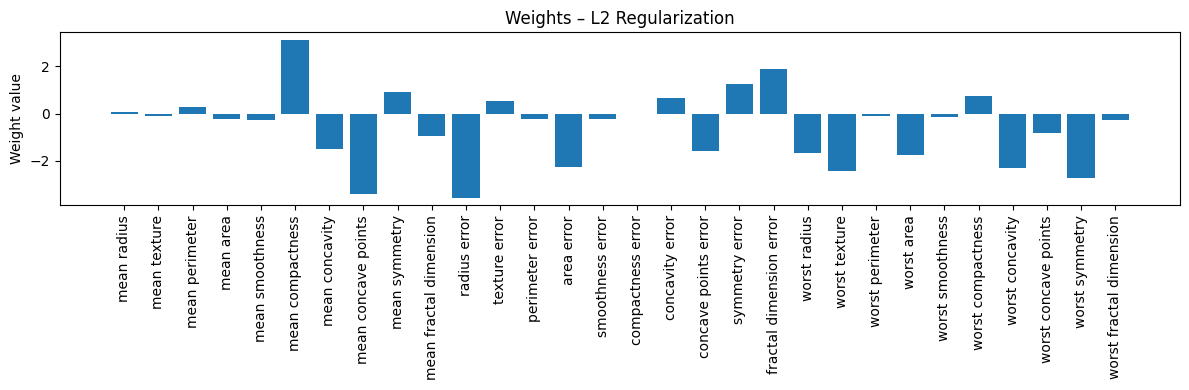

In [172]:
plt.figure(figsize=(12,4))
plt.bar(feature_names, weights_l2)
plt.xticks(rotation=90)
plt.title("Weights – L2 Regularization")
plt.ylabel("Weight value")
plt.tight_layout()
plt.show()


In [142]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_l2,
    X_train,
    y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


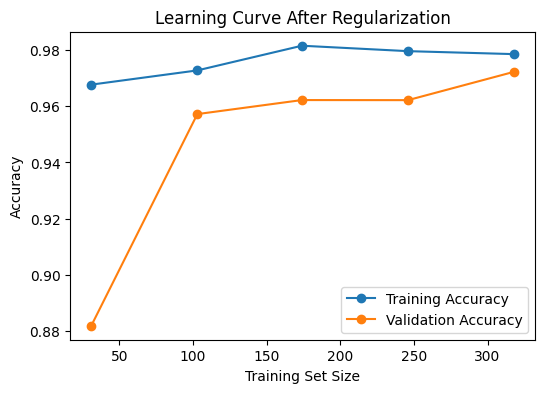

In [143]:
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve After Regularization")
plt.legend()
plt.show()


In [144]:
train_probs_l2 = model_l2.predict_proba(X_train)[:, 1]
mse_l2 = mean_squared_error(y_train, train_probs_l2)

penalty_l2 = lambda_value * np.sum(weights_l2 ** 2)
cost_l2 = mse_l2 + penalty_l2

print("MSE Loss:", mse_l2)
print("Penalty:", penalty_l2)
print("Cost:", cost_l2)


MSE Loss: 0.022878919697931228
Penalty: 30.922607999452648
Cost: 30.94548691915058


In [145]:
train_acc_l2 = accuracy_score(y_train, model_l2.predict(X_train))
test_acc_l2 = accuracy_score(y_test, model_l2.predict(X_test))

print("Train Accuracy:", train_acc_l2)
print("Test Accuracy :", test_acc_l2)


Train Accuracy: 0.9773869346733668
Test Accuracy : 0.9883040935672515


# ELASTIC NET

In [146]:
l1_ratio = 0.5

model_en = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    C=1/lambda_value,
    l1_ratio=l1_ratio,
    max_iter=5000
)
model_en.fit(X_train, y_train)


LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=5000, penalty='elasticnet',
                   solver='saga')

In [147]:
weights_en = model_en.coef_[0]
print("Non-zero weights:", np.sum(np.abs(weights_en) > 1e-4))


Non-zero weights: 18


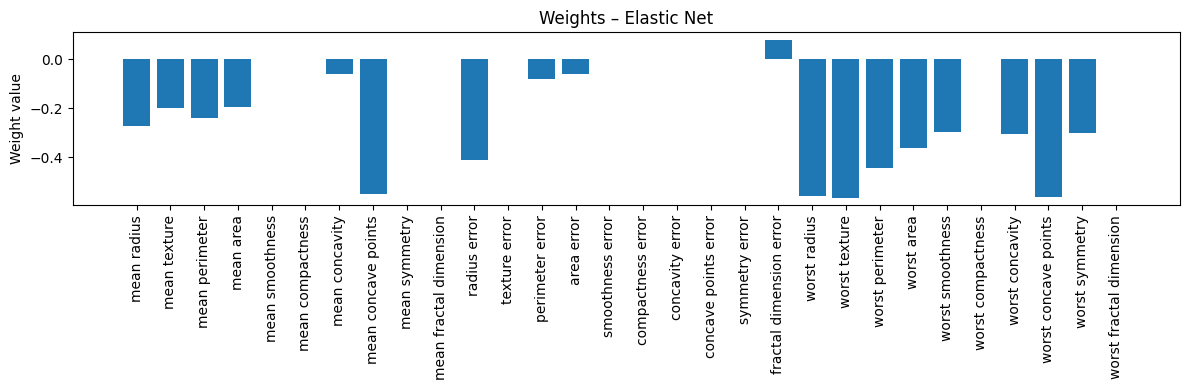

In [148]:
plt.figure(figsize=(12,4))
plt.bar(feature_names, weights_en)
plt.xticks(rotation=90)
plt.title("Weights – Elastic Net")
plt.ylabel("Weight value")
plt.tight_layout()
plt.show()


In [149]:
train_probs_en = model_en.predict_proba(X_train)[:, 1]
mse_en = mean_squared_error(y_train, train_probs_en)

penalty_en = lambda_value * (
    l1_ratio * np.sum(np.abs(weights_en)) +
    (1 - l1_ratio) * np.sum(weights_en ** 2)
)

cost_en = mse_en + penalty_en

print("MSE Loss:", mse_en)
print("Penalty:", penalty_en)
print("Cost:", cost_en)


MSE Loss: 0.02883308029784588
Penalty: 38.937939741383055
Cost: 38.9667728216809


In [150]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_en,
    X_train,
    y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


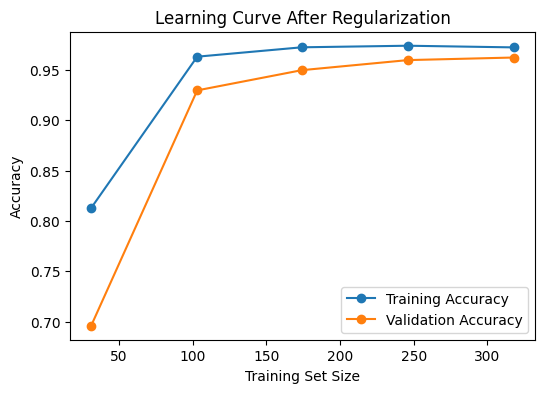

In [151]:
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve After Regularization")
plt.legend()
plt.show()
